In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
from matplotlib import pyplot

In [4]:
PATH = '~/local_workplace/schworks/32130_funDataAna/assignment/a3_data_mining/Assignment3-TrainingData.csv'
df = pd.read_csv(PATH)
# Drop empty rows
df = df.dropna(subset=['Personal_info5', 'Personal_info1'])

# Drop irrelvant Column for Dtree CLassifier
df = df.drop(columns=['Quote_Id','Quote_Date'])

inputs = df.drop('Quote_Flag', axis='columns')
tagert = df['Quote_Flag']
# inputs.columns

In [5]:
# F1 F4 C3 S4 P1 P3 PRO1 PRO3 PRO5 G4 G5 
label_Field1 = LabelEncoder()
label_Field4 = LabelEncoder()
label_Coverage3 = LabelEncoder()
label_Sales4 = LabelEncoder()
label_Personal1 = LabelEncoder()
label_Personal3 = LabelEncoder()
label_Property1 = LabelEncoder()
label_Property3 = LabelEncoder()
label_Property5 = LabelEncoder()
label_Geographic4 = LabelEncoder()
label_Geographic5 = LabelEncoder()

inputs['Field1_n'] = label_Field1.fit_transform(inputs['Field_info1'])
inputs['Field3_n'] = label_Field1.fit_transform(inputs['Field_info3'])
inputs['Field4_n'] = label_Field4.fit_transform(inputs['Field_info4'])
inputs['Coverage3_n'] = label_Coverage3.fit_transform(inputs['Coverage_info3'])
inputs['Sales4_n'] = label_Sales4.fit_transform(inputs['Sales_info4'])
inputs['Personal1_n'] = label_Personal1.fit_transform(inputs['Personal_info1'])
inputs['Personal3_n'] = label_Personal3.fit_transform(inputs['Personal_info3'])
inputs['Property1_n'] = label_Property1.fit_transform(inputs['Property_info1'])
inputs['Property3_n'] = label_Property3.fit_transform(inputs['Property_info3'])
inputs['Property5_n'] = label_Property5.fit_transform(inputs['Property_info5'])
inputs['Geographic4_n'] = label_Geographic4.fit_transform(inputs['Geographic_info4'])
inputs['Geographic5_n'] = label_Geographic5.fit_transform(inputs['Geographic_info5'])

inputs_n = inputs.drop([
    'Field_info1',
    'Field_info3',
    'Field_info4',
    'Coverage_info3',
    'Sales_info4',
    'Personal_info1',
    'Personal_info3',
    'Property_info1',
    'Property_info3',
    'Property_info5',
    'Geographic_info4',
    'Geographic_info5'
], axis='columns')

In [6]:
inputs_n_train, inputs_n_test, tagert_train, tagert_test = train_test_split(inputs_n, tagert, test_size=0.3)

In [7]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(inputs_n_train, tagert_train)
y_pred = dt.predict(inputs_n_test)

dt.score(inputs_n_test, tagert_test)

0.8163140764849471

In [8]:
mat = confusion_matrix(tagert_test, y_pred)
print(mat)

[[7143  869]
 [ 937  883]]


<AxesSubplot:>

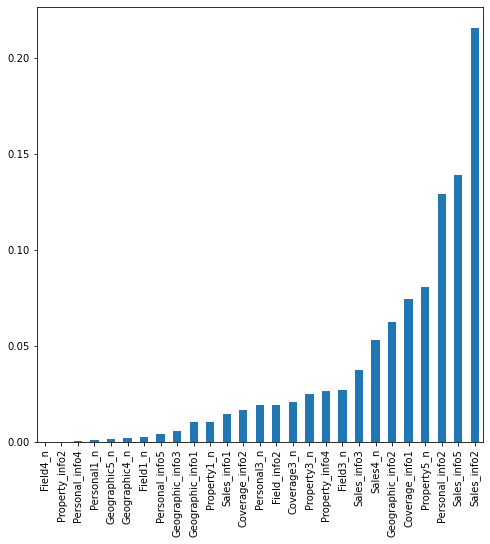

In [9]:
features_name = inputs_n.columns
importances = dt.feature_importances_
dt_impotance_series = pd.Series(importances, index=features_name)
dt_impotance_series.sort_values().plot.bar(figsize=(8,8))

In [10]:
dt_impotance_series.sort_values(ASC=False)

TypeError: sort_values() got an unexpected keyword argument 'ASC'

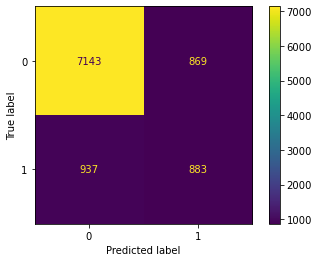

In [11]:
plot_confusion_matrix(dt, inputs_n_test, tagert_test);

#### endemble Classifiers
Starts with 30 trees

In [12]:
from sklearn.ensemble import RandomForestClassifier

With 30 trees 0.850793327908869
OOB Score With 30 trees 0.8512140895418283


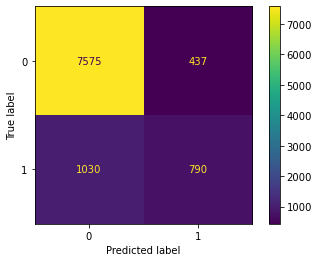

In [13]:
rfc = RandomForestClassifier(n_estimators=30, max_features="auto", oob_score=True)
rfc.fit(inputs_n_train, tagert_train)
rfc30_score= rfc.score(inputs_n_test, tagert_test)
print(f'With 30 trees {rfc30_score}')
oob = rfc.oob_score_
print(f'OOB Score With 30 trees {oob}')
rfc.predict(inputs_n_test)
# rfc.predict_proba(inputs_n_test)
plot_confusion_matrix(rfc, inputs_n_test, tagert_test)

With 40 trees 0.8514035801464606
OOB Score With 40 trees 0.8488600200531845


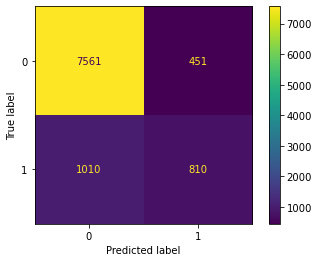

In [14]:
rfc = RandomForestClassifier(n_estimators=40, max_features="auto", oob_score=True)
rfc.fit(inputs_n_train, tagert_train)
rfc40_score= rfc.score(inputs_n_test, tagert_test)
print(f'With 40 trees {rfc40_score}')
oob = rfc.oob_score_
print(f'OOB Score With 40 trees {oob}')
rfc.predict(inputs_n_test)
# rfc.predict_proba(inputs_n_test)
plot_confusion_matrix(rfc, inputs_n_test, tagert_test)

With 50 trees 0.853539462978031
OOB Score With 50 trees 0.8480753302236366


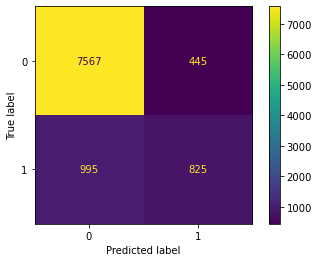

In [15]:
# inputs_n_train, inputs_n_test, tagert_train, tagert_test
rfc = RandomForestClassifier(n_estimators=50, max_features="auto", oob_score=True)
rfc.fit(inputs_n_train, tagert_train)
rfc50_score = rfc.score(inputs_n_test, tagert_test)
print(f'With 50 trees {rfc50_score}')
oob = rfc.oob_score_
print(f'OOB Score With 50 trees {oob}')
rfc.predict(inputs_n_test)
# rfc.predict_proba(inputs_n_test)
plot_confusion_matrix(rfc, inputs_n_test, tagert_test)

With 60 trees 0.851606997558991
OOB Score With 60 trees 0.8531322202362788


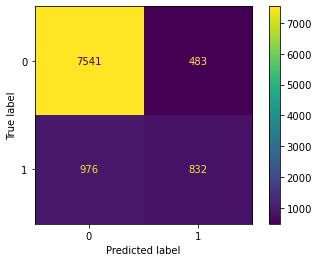

In [83]:
rfc = RandomForestClassifier(n_estimators=60, max_features="auto", oob_score=True)
rfc.fit(inputs_n_train, tagert_train)
rfc60_score = rfc.score(inputs_n_test, tagert_test)
print(f'With 60 trees {rfc60_score}')
oob = rfc.oob_score_
print(f'OOB Score With 60 trees {oob}')
# rfc.predict(inputs_n_test)
# rfc.predict_proba(inputs_n_test)
plot_confusion_matrix(rfc, inputs_n_test, tagert_test)

<AxesSubplot:>

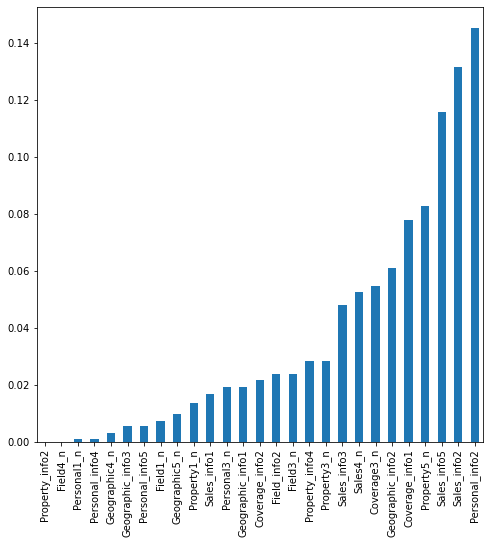

In [16]:
# pred_test = clf.predict([test_point])
# features_name = inputs_n.columns
importances = rfc.feature_importances_
rfc_impotance_series = pd.Series(importances, index=features_name)
rfc_impotance_series.sort_values().plot.bar(figsize=(8,8))

In [82]:
from sklearn.svm import SVC

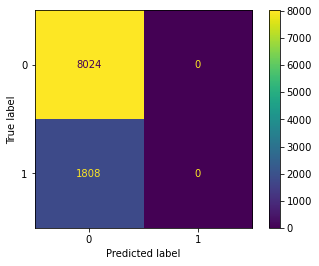

In [87]:
# Kernel => linear / rbf
# C => Regularization 
svc = SVC()
svc.fit(inputs_n_train, tagert_train)
svc.score(inputs_n_test, tagert_test)
plot_confusion_matrix(svc, inputs_n_test, tagert_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

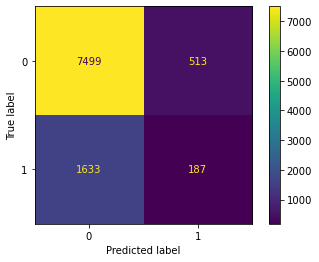

In [18]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputs_n_train, tagert_train)
knn.score(inputs_n_test, tagert_test)
plot_confusion_matrix(knn, inputs_n_test, tagert_test)

In [19]:
import matplotlib.pyplot as plt

In [34]:
# x_pred = knn.predict_proba(inputs_n_test)
# inputs_n_train, inputs_n_test, tagert_train, tagert_test 

y_probs = knn.predict_proba(inputs_n_test)
y_probs_class_1 = y_probs[:, 1]
auc = roc_auc_score(tagert_test, y_probs_class_1)
fpr, tpr, thresholds = roc_curve(tagert_test, y_probs_class_1, pos_label=1)


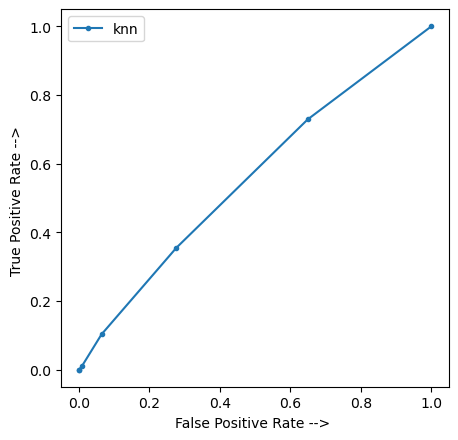

In [37]:
# Predict will give either 0 or 1 as output
# Predict_proba will give the only probability of 1.
plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='knn' % auc)

plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()
plt.show()


In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [48]:
folds = StratifiedKFold(n_splits=10)
# folds.get_n_splits(tagert)
# inputs_n, tagert
for train_index, test_index in folds.split(tagert):
     X_train, X_test, y_train, y_test = (
         inputs_n[train_index],
         inputs_n[test_index],
         tagert[train_index],
         tagert[test_index]
     )


TypeError: split() missing 1 required positional argument: 'y'

In [ ]:
# Binarization
# Field_1 = pd.get_dummies(inputs_n['Field_info1'], prefix='Field1')
# Coverage_3 = pd.get_dummies(inputs_n['Coverage_info3'], prefix='Coverage3')
# Sales_4 = pd.get_dummies(df['Sales_info4'], prefix='Sales4')
# Personal_3 = pd.get_dummies(df['Personal_info3'], prefix='Personal3')
# Property_3 = pd.get_dummies(df['Property_info3'], prefix='Property3')
# Geographic_5 = pd.get_dummies(df['Geographic_info5'], prefix='Geographic5')
# Field_3 = pd.get_dummies(df['Geographic_info5'], prefix='Geographic5')